In [ ]:
import numpy as np

## 단순한 논리 회로

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

## 활성화 함수 

In [ ]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
def step_function(x):
  y = x > 0
  return y.astype(np.int)

In [ ]:
import numpy as np

In [ ]:
x = np.array([-1.0, 1.0, 2.0])

In [ ]:
x

array([-1.,  1.,  2.])

In [ ]:
y = x > 0

In [ ]:
y

array([False,  True,  True])

In [ ]:
y = y.astype(np.int)

In [ ]:
y

array([0, 1, 1])

In [ ]:
import numpy as np
import matplotlib.pylab as plt

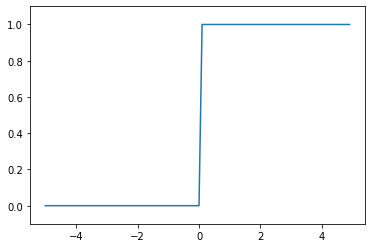

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
y = sigmoid(x)
print(y)

[0.26894142 0.73105858 0.88079708]


## 다차원 배열의 계산

In [ ]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [ ]:
B = np.array([[1,2], [3,4], [5,6]])

In [ ]:
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

In [ ]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

## 신경망 구현하기

In [ ]:
import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], 
              [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [ ]:
print(A1)

[0.3 0.7 1.1]


In [ ]:
Z1 = sigmoid(A1)

In [ ]:
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


## 신경망 구현 내용 정리

In [ ]:
def identity_function(x):
  return x

def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network


def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(y)


[0.31682708 0.69627909]


## 소프트맥스 함수

In [ ]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [ ]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [ ]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y